# Perform principal components analysis to cluster the samples based on their SNP genotypes. Plot your samples on the first and second principal components.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# look up doc for PCA and sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load file 
df = pd.read_csv('/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt', sep = "\t")
df

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 
alt_allele_counts = df.iloc[:,4:].sum(axis = 1)
total_chrom = 2*(len(df.columns)-4)
alt_allele_freq = alt_allele_counts.div(total_chrom)
print(alt_allele_freq)

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64


In [4]:
common_var = df.loc[(alt_allele_freq >= 0.05) & (alt_allele_freq<= 0.95)]
common_var = common_var.iloc[:,4:]

In [5]:
pca_input = common_var.T

In [6]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0) #mean
pca = PCA(n_components = 10) # keep first ten reductions
pca_output = pca.fit_transform(pca_input_standardized)
pca_output
pca_output_df = pd.DataFrame(data = pca_output,
                columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546413,-5.396445,-0.507256,-0.221831,1.227343,0.406220,-3.700149,-3.952438
1,-6.133884,-8.631829,2.556842,-3.895753,0.323820,-2.443054,1.280692,5.289700,-1.865443,1.819368
2,-6.238473,-7.971870,-0.746288,-4.015695,-0.916560,3.925038,-0.081101,-2.347959,1.033443,-0.784696
3,-5.051218,-7.008727,2.804799,-4.763387,4.386264,0.280237,-0.003501,-2.664319,1.072966,-1.412078
4,-6.634383,-8.543670,3.071756,-1.594660,-4.371474,1.007933,1.576049,-2.993830,1.816235,-0.090996
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665118,3.299410,-0.202104,-0.440885,-2.983149,-0.109660,0.479648,0.727135
2544,-6.295888,-3.116491,-5.555705,3.335551,3.337533,3.448736,-0.501619,-3.445715,-1.595049,1.284135
2545,-4.096947,-2.827362,-4.179632,3.694832,1.539790,0.303012,-1.630794,-0.057513,4.141318,3.048317
2546,-6.263462,-2.585080,-4.225758,3.891658,-3.937191,-1.767222,-0.290286,-0.215223,1.680066,3.155564


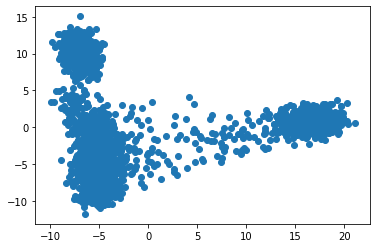

In [7]:
fx, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])